In [36]:
# 1. population.csv 파일을 DataFrame으로 읽고 내용 확인
#       -> 인구수 속의 숫자 구분기호인 ,를 없애고 자료형을 숫자로 바꿔라
#       -> "1,234,456" -> "1,234,456" -> 1234456
# 2. 현재 연구자 거주지 동의 인구 정보 조회 (행 전체)

# 3. 총인구수가 가장 많은 동 조회 (읍면동 단위)
# 4. 남성인구비가 가장 높은 동 조회 (읍면동 단위)
# 5. 도시 법정동 1선정, 농촌 법정동 1선정, 인구 분표 비교 (읍면동 단위, bar plot 사용)
# 6. 현재 연구자 거주지 동의 연령별 인구를 그래프로 표시


In [37]:
# 1. population.csv 파일을 DataFrame으로 읽고 내용 확인

import pandas as pd

df = pd.read_csv("data-files/population.csv", low_memory=False)


In [38]:
# 인구 수에서 , 없애기
df = df.replace(',', '', regex=True)
df.head(3)

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
0,서울특별시 (1100000000),9350995,9350995,38100,38486,40625,42608,44377,47757,51072,...,6767,5474,3921,3343,2623,1892,1391,776,523,1184
1,서울특별시 종로구 (1111000000),138879,138879,415,419,467,471,516,512,580,...,131,105,87,63,52,46,34,21,8,33
2,서울특별시 종로구 청운효자동(1111051500),11143,11143,52,35,43,48,46,50,50,...,13,10,11,3,6,4,1,2,0,4


In [39]:
# 인구 수를 문자열에서 숫자로 바꾸기
df1 = df.iloc[:, 0]
df2 = df.iloc[:, 1:]
df2.head(2)
df2 = df2.astype('int32')
df2.dtypes

2024년09월_계_총인구수       int32
2024년09월_계_연령구간인구수    int32
2024년09월_계_0세         int32
2024년09월_계_1세         int32
2024년09월_계_2세         int32
                      ...  
2024년09월_여_96세        int32
2024년09월_여_97세        int32
2024년09월_여_98세        int32
2024년09월_여_99세        int32
2024년09월_여_100세 이상    int32
Length: 309, dtype: object

In [40]:
# 합치기
df = pd.concat([df1, df2], axis = 1)
df.head(2)
df.dtypes

행정구역                  object
2024년09월_계_총인구수        int32
2024년09월_계_연령구간인구수     int32
2024년09월_계_0세          int32
2024년09월_계_1세          int32
                       ...  
2024년09월_여_96세         int32
2024년09월_여_97세         int32
2024년09월_여_98세         int32
2024년09월_여_99세         int32
2024년09월_여_100세 이상     int32
Length: 310, dtype: object

In [41]:
# 2. 현재 연구자 거주지 동의 인구 정보 조회 (행 전체)
df[df['행정구역'].str.contains('괴안동')]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
1471,경기도 부천시 소사구 괴안동(4119457000),18500,18500,63,54,70,74,86,87,83,...,28,23,14,10,6,7,5,2,2,8


### 선생님과 함께 1번, 2번 (+문자열에서 숫자로 변환까지)

In [42]:
import pandas as pd

In [43]:
population = pd.read_csv('data-files/population.csv')

C:\Users\human\AppData\Local\Temp\ipykernel_444\804588561.py:1: DtypeWarning: Columns (100,101,103,198,199,200,201,305,306,307,309) have mixed types. Specify dtype option on import or set low_memory=False.
  population = pd.read_csv('data-files/population.csv')


In [44]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Columns: 310 entries, 행정구역 to 2024년09월_여_100세 이상
dtypes: int64(7), object(303)
memory usage: 9.2+ MB


In [45]:
population.head(3)

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
0,서울특별시 (1100000000),"9,350,995","9,350,995","38,100","38,486","40,625","42,608","44,377","47,757","51,072",...,"6,767","5,474","3,921","3,343","2,623","1,892","1,391",776,523,"1,184"
1,서울특별시 종로구 (1111000000),"138,879","138,879",415,419,467,471,516,512,580,...,131,105,87,63,52,46,34,21,8,33
2,서울특별시 종로구 청운효자동(1111051500),"11,143","11,143",52,35,43,48,46,50,50,...,13,10,11,3,6,4,1,2,0,4


In [46]:
# Series.str : Series에 포함된 문자열 각각에 적용할 함수를 포함하는 객체
# 따라서 내장된 반복문을 실행하여서 for문을 만드는 것보다 훨씬 빠르고 간결하다.
dong_filter = population['행정구역'].str.contains('괴안동')
population[dong_filter]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
1471,경기도 부천시 소사구 괴안동(4119457000),"18,500","18,500",63,54,70,74,86,87,83,...,28,23,14,10,6,7,5,2,2,8


In [47]:
"1" in "1234567"

True

In [48]:
# 인구수를 숫자 자료형으로 바꾸기
# "1,234,456" -> "1,234,456" -> 1234456
print(population['2024년09월_계_총인구수'].dtype)
# 데이터 타입은 문자열로 확인된다.

population['2024년09월_계_총인구수'] = \
        population['2024년09월_계_총인구수'].map(lambda v : int(str(v).replace(",", "")))
        # 쉼표 제거 및 int로 자료형 바꾸기
        # v는 행 하나 하나의 값


object


In [49]:
population['2024년09월_계_총인구수'].dtype
population['2024년09월_계_총인구수']

0       9350995
1        138879
2         11143
3          8995
4          2234
         ...   
3905      11111
3906      15106
3907      13755
3908      12285
3909       3833
Name: 2024년09월_계_총인구수, Length: 3910, dtype: int64

In [50]:
population["행정구역"]
# 코드에 규칙이 있다.
# 서울특별시 종로구 청운효자동(1111051500)에서 51500 부분이 동을 표시하는 부분

0                서울특별시  (1100000000)
1             서울특별시 종로구 (1111000000)
2        서울특별시 종로구 청운효자동(1111051500)
3          서울특별시 종로구 사직동(1111053000)
4          서울특별시 종로구 삼청동(1111054000)
                    ...             
3905    제주특별자치도 서귀포시 서홍동(5013058000)
3906    제주특별자치도 서귀포시 대륜동(5013059000)
3907    제주특별자치도 서귀포시 대천동(5013060000)
3908    제주특별자치도 서귀포시 중문동(5013061000)
3909    제주특별자치도 서귀포시 예래동(5013062000)
Name: 행정구역, Length: 3910, dtype: object

In [51]:
area_mask = population['행정구역'].map(lambda v: v[-6] != '0') # 동 행정구역 찾기
max_value = population[area_mask]['2024년09월_계_총인구수'].max()
max_value

population[population['2024년09월_계_총인구수'] == max_value ]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
3715,경상남도 양산시 물금읍(4833025300),117160,"117,160",643,739,845,882,"1,114","1,169","1,403",...,46,42,31,18,24,12,4,5,4,9


In [52]:
print( population.head(3) )
print( population.columns )


                          행정구역  2024년09월_계_총인구수 2024년09월_계_연령구간인구수  \
0          서울특별시  (1100000000)          9350995          9,350,995   
1       서울특별시 종로구 (1111000000)           138879            138,879   
2  서울특별시 종로구 청운효자동(1111051500)            11143             11,143   

  2024년09월_계_0세 2024년09월_계_1세 2024년09월_계_2세 2024년09월_계_3세 2024년09월_계_4세  \
0        38,100        38,486        40,625        42,608        44,377   
1           415           419           467           471           516   
2            52            35            43            48            46   

  2024년09월_계_5세 2024년09월_계_6세  ... 2024년09월_여_91세 2024년09월_여_92세  \
0        47,757        51,072  ...          6,767          5,474   
1           512           580  ...            131            105   
2            50            50  ...             13             10   

  2024년09월_여_93세 2024년09월_여_94세 2024년09월_여_95세 2024년09월_여_96세 2024년09월_여_97세  \
0          3,921          3,343          2,623          1,892    

### 4번 부터 (내가 해보기)

In [53]:
# 4. 남성인구비가 가장 높은 동 조회 (읍면동 단위)
# 5. 도시 법정동 1선정, 농촌 법정동 1선정, 인구 분표 비교 (읍면동 단위, bar plot 사용)
# 6. 현재 연구자 거주지 동의 연령별 인구를 그래프로 표시

# "2024년09월_계_총인구수"
# "2024년09월_남_총인구수"
# "2024년09월_여_총인구수"
# 위 3개의 컬럼 사용

In [54]:
df["2024년09월_남_총인구수"] = \
        df["2024년09월_남_총인구수"].map(lambda v : int(str(v).replace(",", "")))

df["2024년09월_여_총인구수"] = \
        df["2024년09월_여_총인구수"].map(lambda v : int(str(v).replace(",", "")))

In [55]:
t_pop = df.loc[:, "2024년09월_계_총인구수"]
m_pop = df.loc[:, "2024년09월_남_총인구수"]
f_pop = df.loc[:, "2024년09월_여_총인구수"]
print( (t_pop, m_pop, f_pop) )

(0       9350995
1        138879
2         11143
3          8995
4          2234
         ...   
3905      11111
3906      15106
3907      13755
3908      12285
3909       3833
Name: 2024년09월_계_총인구수, Length: 3910, dtype: int32, 0       4515791
1         66846
2          5079
3          3948
4          1073
         ...   
3905       5464
3906       7617
3907       6986
3908       6223
3909       1972
Name: 2024년09월_남_총인구수, Length: 3910, dtype: int64, 0       4835204
1         72033
2          6064
3          5047
4          1161
         ...   
3905       5647
3906       7489
3907       6769
3908       6062
3909       1861
Name: 2024년09월_여_총인구수, Length: 3910, dtype: int64)


In [56]:
m_t = m_pop.div(t_pop)
f_t = f_pop.div(t_pop)
# m_t.to_frame(name = "남성비")
# f_t.to_frame(name = "여성비")
# print (type(m_t))
# print ( m_t )

df["남성비"] = m_t
df["여성비"] = f_t

# m_f = m_t.add(f_t)
# print(m_f)

# print( m_t.max() )

# population.insert(1, )


In [70]:
df.head(1)
df.dtypes

행정구역                   object
2024년09월_계_총인구수         int64
2024년09월_계_연령구간인구수      int64
2024년09월_계_0세           int64
2024년09월_계_1세           int64
                       ...   
2024년09월_여_98세          int64
2024년09월_여_99세          int64
2024년09월_여_100세 이상      int64
남성비                   float64
여성비                   float64
Length: 312, dtype: object

In [58]:
area_mask = df['행정구역'].map(lambda v: v[-6] != '0') # 동 행정구역 찾기
max_value = df[area_mask]['남성비'].max()
max_value

print( "남성비가 가장 높은 지역:" )
df[df['남성비'] == max_value ]

남성비가 가장 높은 지역:


,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상,남성비,여성비
1765,경기도 파주시 월롱면(4148031000),8366,8366,9,7,3,9,9,7,13,...,5,1,5,3,1,3,0,2,0.653717,0.346283


In [59]:
area_mask = df['행정구역'].map(lambda v: v[-6] != '0') # 동 행정구역 찾기
max_value = df[area_mask]['여성비'].max()
max_value

print( "여성비가 가장 높은 지역:" )
df[df['여성비'] == max_value ]

여성비가 가장 높은 지역:


,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상,남성비,여성비
121,서울특별시 성북구 동선동(1129057500),15081,15081,31,27,25,29,34,30,36,...,7,6,5,2,1,1,3,3,0.40866,0.59134


## 선생님과 함께 4번

In [69]:
# 행정구역 제외한 모든 컬럼 숫자로 바꾸기

def value_to_int(v): # 함수를 만듦
    if not v or str(v) == 'nan':  # 값에 문제가 있다면 0 반환
        return 0
    
    str_v = str(v) # 정상이면 문자로 바꾸고
    replaced_v = str_v.replace(",", "") # 쉼표 없애고
    int_v = int(replaced_v) # 숫자로 바꿔서
    
    return int_v # 바꾼걸 반환해라
# 위는 함수를 만들어서 변경 - 자바에서 많이 쓰는 방법

# 아래는 람다 돌려서 변경 - 파이썬에서 많이 쓰는 방법
# population.columns[1:]
for column in population.columns[1:]:
    # print(column)
    # 밑에 맵코드 3개 중 택1해서 쓰면 됨
    # population[column] = population[column].map(lambda v : int(str(v).replace(",", "")))
    # 비어 있는것이 있어서 에러날 수 있다. 이걸 수정한 것이 바로 아래 코드
    # population[column] = population[column].map(lambda v : int(str(v).replace(",", "")) if v and str(v) != "nan" else 0)
    population[column] = population[column].map(value_to_int) # 위에서 만든 함수를 받음


In [61]:
population.dtypes

행정구역                  object
2024년09월_계_총인구수        int64
2024년09월_계_연령구간인구수     int64
2024년09월_계_0세          int64
2024년09월_계_1세          int64
                       ...  
2024년09월_여_96세         int64
2024년09월_여_97세         int64
2024년09월_여_98세         int64
2024년09월_여_99세         int64
2024년09월_여_100세 이상     int64
Length: 310, dtype: object

In [62]:
# 남성비 구하기

male_ratio = population["2024년09월_남_총인구수"] / population["2024년09월_계_총인구수"]
# type(male_ratio)
male_ratio.argmax() # 가장 큰 값이 있는 행 index
# 연산된 결과로 나오는 시리즈는 인덱스가 보장된다
# 즉 원본 데이터 인덱스를 공유하는 것.
# male_ratio
population.loc[male_ratio.argmax()]  # loc[행인덱스, 열인덱스] # 열인덱스 생략 가능
print( male_ratio.max(), male_ratio.min() )
population.loc[male_ratio.argmin()]  # 남성비 최저 = 여성비 최고

0.6537174276834807 0.4086599031894437


행정구역                  서울특별시 성북구 동선동(1129057500)
2024년09월_계_총인구수                           15081
2024년09월_계_연령구간인구수                        15081
2024년09월_계_0세                                31
2024년09월_계_1세                                27
                                ...            
2024년09월_여_96세                                2
2024년09월_여_97세                                1
2024년09월_여_98세                                1
2024년09월_여_99세                                3
2024년09월_여_100세 이상                            3
Name: 121, Length: 310, dtype: object

### 내가 5번 해보기

In [63]:
# 5. 도시 법정동 1선정, 농촌 법정동 1선정, 인구 분표 비교 (읍면동 단위, bar plot 사용)

In [123]:
city_filter = df[df['행정구역'].str.contains('영등포동')] # 307
rural_filter = df[df['행정구역'].str.contains('의성읍')] #3399
city_filter, rural_filter

(                            행정구역  2024년09월_계_총인구수  2024년09월_계_연령구간인구수  \
 307  서울특별시 영등포구 영등포동(1156053500)            31360               31360   
 
      2024년09월_계_0세  2024년09월_계_1세  2024년09월_계_2세  2024년09월_계_3세  \
 307            110            113            137             89   
 
      2024년09월_계_4세  2024년09월_계_5세  2024년09월_계_6세  ...  2024년09월_여_93세  \
 307            118             92             99  ...              10   
 
      2024년09월_여_94세  2024년09월_여_95세  2024년09월_여_96세  2024년09월_여_97세  \
 307              10               9               4               2   
 
      2024년09월_여_98세  2024년09월_여_99세  2024년09월_여_100세 이상       남성비       여성비  
 307               2               1                   3  0.506537  0.493463  
 
 [1 rows x 312 columns],
                           행정구역  2024년09월_계_총인구수  2024년09월_계_연령구간인구수  \
 3399  경상북도 의성군 의성읍(4773025000)            12381               12381   
 
       2024년09월_계_0세  2024년09월_계_1세  2024년09월_계_2세  2024년09월_계_3세  \
 3399           

In [121]:
# 5. 도시 법정동 1선정, 농촌 법정동 1선정, 인구 분표 비교 (읍면동 단위, bar plot 사용)
#    2024년09월_계_0세 ~ 2024년09월_계_100세 컬럼의 데이터 사용
# "서울특별시 영등포구 영등포동(1156053500)" "경상북도 의성군 의성읍(4773025000)"


city_filter = df.iloc[307, 3:104]
city_filter
# city_filter2 = city_filter[["2024년09월_계_총인구수", "남성비", "여성비"]]
# city_filter2

rural_filter = df.iloc[3399, 3:104]
rural_filter

2024년09월_계_0세         44
2024년09월_계_1세         53
2024년09월_계_2세         47
2024년09월_계_3세         37
2024년09월_계_4세         60
                      ..
2024년09월_계_96세        10
2024년09월_계_97세         4
2024년09월_계_98세         1
2024년09월_계_99세         2
2024년09월_계_100세 이상     1
Name: 3399, Length: 101, dtype: object

In [90]:
# 6. 현재 연구자 거주지 동의 연령별 인구를 그래프로 표시
my_filter = df[df['행정구역'].str.contains('괴안동')] # 1471
# my_filter
my_filter = df.iloc[1471, 3:104]
# my_filter


In [75]:
import numpy as np

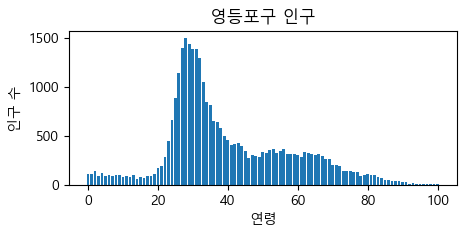

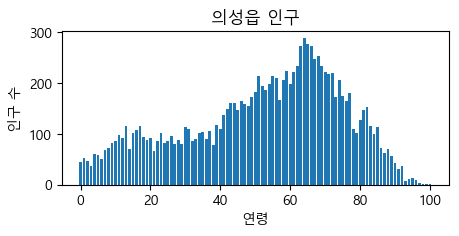

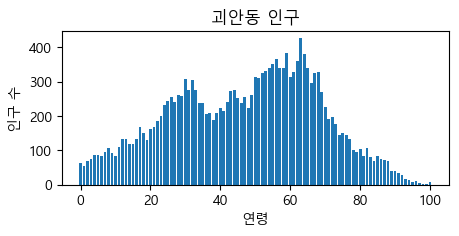

In [94]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(1, figsize=(5, 2))
plt.bar(np.arange(city_filter.values.size), city_filter.values)
plt.title("영등포구 인구")
plt.xlabel("연령")
plt.ylabel("인구 수")

plt.figure(2, figsize=(5, 2))
plt.bar(np.arange(rural_filter.values.size), rural_filter.values)
plt.title("의성읍 인구")
plt.xlabel("연령")
plt.ylabel("인구 수")

plt.figure(3, figsize=(5, 2))
plt.bar(np.arange(my_filter.values.size), my_filter.values)
plt.title("괴안동 인구")
plt.xlabel("연령")
plt.ylabel("인구 수")

plt.show()

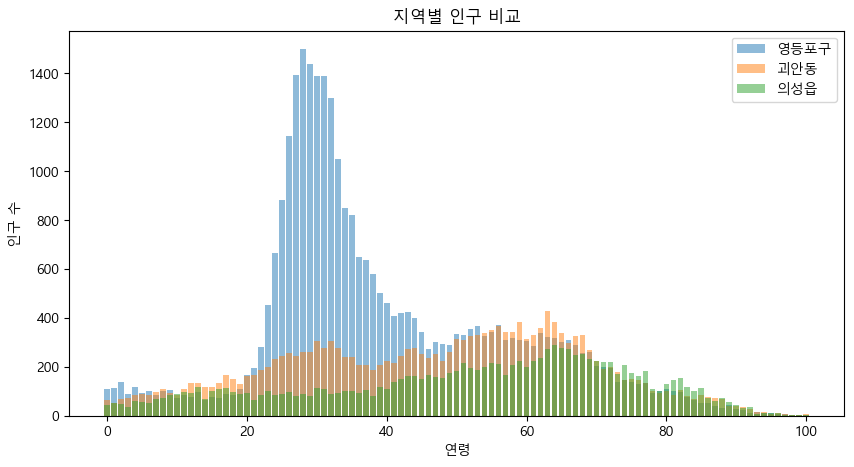

In [120]:
plt.figure(figsize=(10, 5))
plt.bar(np.arange(city_filter.values.size), city_filter.values, label = "영등포구", alpha = 0.5)
plt.bar(np.arange(my_filter.values.size), my_filter.values, label = "괴안동", alpha = 0.5)
plt.bar(np.arange(rural_filter.values.size), rural_filter.values, label = "의성읍", alpha = 0.5)

plt.title("지역별 인구 비교")
plt.xlabel("연령")
plt.ylabel("인구 수")
plt.legend()

plt.show()
# 3개 그리고 싶으면 선으로 그리거나 묶음 막대 그래프로 그리기

### 선생님과 함께 5번 6번

In [128]:
# 일단 이 패키지는 넣고 시작
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [135]:
population[population['행정구역'].str.contains('창평면')]
population[population['행정구역'].str.contains('역삼2동')]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
393,서울특별시 강남구 역삼2동(1168065000),36338,36338,109,102,105,131,128,173,211,...,8,8,16,5,2,3,1,1,1,2


In [139]:
# 특정 지역의 0세 ~ 100세 데이터를 찾아서 ndarray로 저장 - 이걸 하는게 values

population_per_age392 = population.loc[392, '2024년09월_계_0세':'2024년09월_계_100세 이상'].values # 역삼2동
population_per_age2942 = population.loc[2942, '2024년09월_계_0세':'2024년09월_계_100세 이상'].values # 창평면


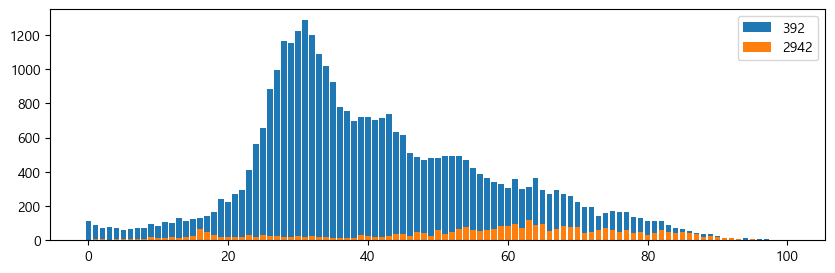

In [140]:
# 가정 : 도시에는 젋은이가 많고, 농촌에는 노인이 많을 것이다.
# Q : 이걸 어떻게 보여줄까? -> 시각화

plt.figure(figsize=(10, 3))
plt.bar(np.arange(101), population_per_age392, label = '392')
# x축에 np.range, 데이터는 age392
plt.bar(np.arange(101), population_per_age2942, label = '2942')
plt.legend()

plt.show()


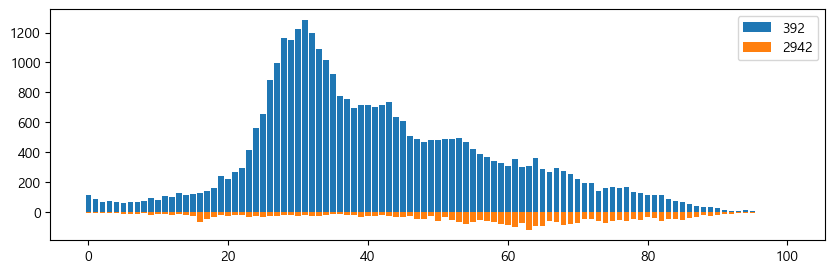

In [142]:
plt.figure(figsize=(10, 3))
plt.bar(np.arange(101), population_per_age392, label = '392')
plt.bar(np.arange(101), -population_per_age2942, label = '2942')
# -를 붙이면 마이너스가 되어서 그래프가 밑으로 떨어진다.
plt.legend()

plt.show()


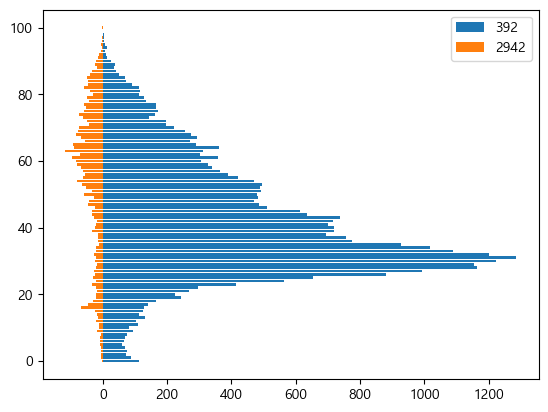

In [143]:
plt.barh(np.arange(101), population_per_age392, label = '392')
plt.barh(np.arange(101), -population_per_age2942, label = '2942')
plt.legend()

plt.show()


In [145]:
# 총합해서 나누고 * 100 = 백분율
population_per_age_ratio392 = population_per_age392 / population_per_age392.sum() * 100
population_per_age_ratio2942 = population_per_age2942 / population_per_age2942.sum() * 100

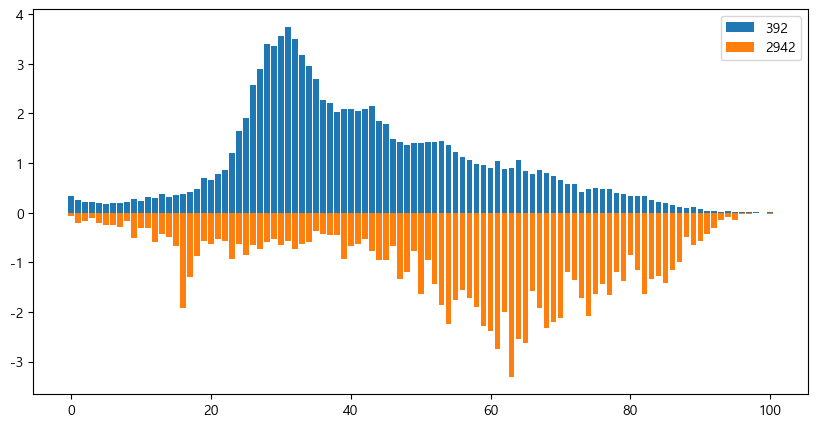

In [148]:
# 크기비교라면 그대로 비교하지만,  
# 특징을 비교할때는 기준을 맞춰라 - 그래서 비율을 사용
plt.figure(figsize=(10, 5))
plt.bar(np.arange(101), population_per_age_ratio392, label = '392')
plt.bar(np.arange(101), -population_per_age_ratio2942, label = '2942')
plt.legend()

plt.show()

## 선생님과 함께하는 6번

In [165]:
idx = population[population['행정구역'].str.contains('괴안동')].index # 동네 찾는 코드 - 인덱스
idx[0]

np.int64(1471)

In [172]:
# 특정 지역의 0세 ~ 100세 데이터를 찾아서 ndarray로 저장 - 이걸 하는게 values
m_pop_per_a = population.loc[1471, '2024년09월_남_0세':'2024년09월_남_100세 이상'].values
f_pop_per_a = population.loc[1471, '2024년09월_여_0세':'2024년09월_여_100세 이상'].values
t_pop_per_a = population.loc[1471, '2024년09월_계_0세':'2024년09월_계_100세 이상'].values

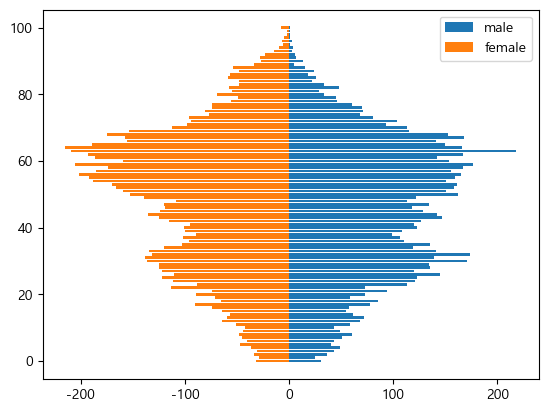

In [173]:
plt.barh(np.arange(101), m_pop_per_age, label = 'male')
plt.barh(np.arange(101), -f_pop_per_age, label = 'female')
plt.legend()
plt.show()


In [ ]:
# 이 지역은 40대 및 20세 미만 인구가 적은 지역으로 확인됨

# 그러면 이유에 대한 분석 시작
# 소득수준이 낮으면 출산율이 낮다. (소득수준과 출산율의 비레성)
# 소득수준이 낮다면 왜 그런지. 
# 자영업자가 많은지 급여 근로자가 많은지

추가 과제 - 남성 인구비가 가장 높은 지역 (월롱면)의 남 여 인구 구성을 시각화 (bar-plot)

추가 과제 - 여성 인구비가 가장 높은 지역 (동선동)의 남 여 인구 구성을 시각화 (bar-plot)


In [162]:
idx1 = df[df['행정구역'].str.contains('월롱면')].index # 동네 찾는 코드 - 인덱스
idx[0]

np.int64(1765)

In [164]:
idx2 = df[df['행정구역'].str.contains('동선동')].index # 동네 찾는 코드 - 인덱스
idx[0]

np.int64(121)

In [170]:
df.head(1)

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상,남성비,여성비
0,서울특별시 (1100000000),9350995,9350995,38100,38486,40625,42608,44377,47757,51072,...,3921,3343,2623,1892,1391,776,523,1184,0.482921,0.517079


In [184]:
df.loc[1765, '남성비':'여성비']

남성비    0.653717
여성비    0.346283
Name: 1765, dtype: object

In [187]:
# 특정 지역의 0세 ~ 100세 데이터를 찾아서 ndarray로 저장 - 이걸 하는게 values

population_per_age1765 = df.loc[1765, '남성비':'여성비'] # 월롱면
population_per_age121 = df.loc[121, '남성비':'여성비'] # 동선동
total = pd.concat([population_per_age1765, population_per_age121], axis=1)
total.columns = ["월롱면", "동선동"]
total

,월롱면,동선동
남성비,0.653717,0.40866
여성비,0.346283,0.59134


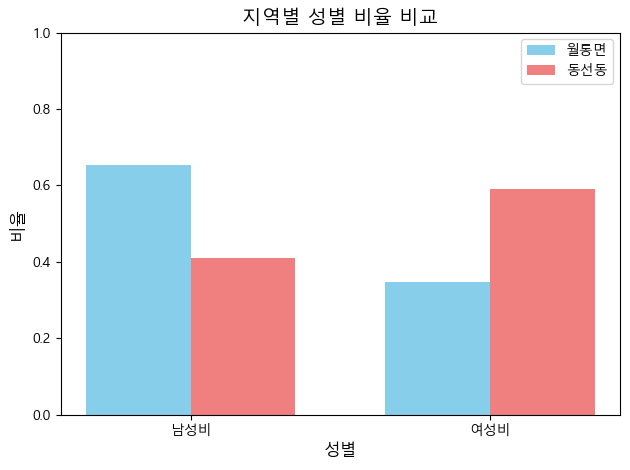

In [195]:
# 막대의 위치 설정
x = np.arange(2)
width = 0.35

# 막대 그래프 생성
plt.bar(x - width/2, total['월롱면'], width, label='월롱면', color='skyblue')
plt.bar(x + width/2, total['동선동'], width, label='동선동', color='lightcoral')

# 그래프 꾸미기
plt.title('지역별 성별 비율 비교', fontsize=14)
plt.xlabel('성별', fontsize=12)
plt.ylabel('비율', fontsize=12)
plt.xticks(x, ['남성비', '여성비'])
# 이 코드는 x축의 위치값 [0, 1]을 ['남성비', '여성비']로 바꿔서 보여주는 역할
plt.ylim(0, 1)  # y축 범위 설정

# 비율값 표시
# for i in range(2):
#     plt.text(x[i] - width/2, total['월롱면'][i], f'{total["월롱면"][i]:.2%}', 
#              ha='center', va='bottom')
#     plt.text(x[i] + width/2, total['동선동'][i], f'{total["동선동"][i]:.2%}', 
#              ha='center', va='bottom')

plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [196]:
# # 잘못된 방법
# plt.bar(2 - width/2, total['월롱면'], width, label='월롱면')
# plt.bar(2 + width/2, total['동선동'], width, label='동선동')
# # 이러면 x축의 2라는 위치에만 모든 막대가 그려지게 됩니다.

# 올바른 방법
# x = np.arange(2)  # [0, 1] 배열 생성
# plt.bar(x - width/2, total['월롱면'], width, label='월롱면')
# plt.bar(x + width/2, total['동선동'], width, label='동선동')
# 이러면 0과 1 위치에 각각 막대가 그려지게 됩니다.